# Binary Classification with MLPClassifier

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fruit2class.csv')

In [3]:
df.head()

,m,d,target
0,6.0,4.2,0
1,5.7,3.6,0
2,6.5,5.5,0
3,6.6,3.2,0
4,6.9,5.9,0


In [4]:
df.sample(7)

,m,d,target
14,8.7,3.5,0
13,6.1,5.0,0
5,8.0,3.1,0
2,6.5,5.5,0
12,9.0,4.0,0
8,7.5,3.8,1
11,8.0,6.0,0


In [5]:
df.sample(6, random_state=1)

,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,0
4,6.9,5.9,0


In [6]:
df.target.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='m', ylabel='d'>

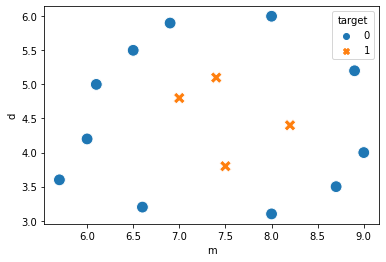

In [7]:
sns.scatterplot(x='m', y='d', data=df, hue='target', style='target', s=140)

In [8]:
X = df.drop('target', axis=1)

In [9]:
y = df.target

In [10]:
X

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,6.9,5.9
5,8.0,3.1
6,8.2,4.4
7,7.0,4.8
8,7.5,3.8
9,7.4,5.1


In [11]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
Name: target, dtype: int64

In [12]:
type(y)

pandas.core.series.Series

## Feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X)
y_train = y

In [15]:
df.sample(6, random_state=1)

,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,0
4,6.9,5.9,0


In [16]:
df_sc = pd.DataFrame(X_train, columns=['d', 'm'])
df_sc['target'] = y_train
df_sc.sample(6, random_state=1)

,d,m,target
3,-0.736514,-1.398477,0
7,-0.352246,0.340562,1
6,0.800559,-0.094198,1
2,-0.832581,1.101391,0
10,1.473028,0.775322,0
4,-0.448313,1.536151,0


## Trainning the model

In [17]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# convergence at 
# hidden = 100
# iter = 805 set at 2000

In [149]:
hidden = 10
iter = 2000

In [150]:
model = MLPClassifier(hidden_layer_sizes=(hidden),random_state=1, max_iter= iter) # always random the same value

In [151]:
model.fit(X_train, y_train)

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=10, max_iter=2000, random_state=1)

In [152]:
print('score: {:.4f}'.format(model.score(X_train, y_train)))
# print('score:',model.score(X_train, y_train).round(4))
print('actual y:', np.array(y))
print('predicted:', model.predict(X_train))

score: 1.0000
actual y: [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
predicted: [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]


## Performance measuring

In [153]:
from sklearn.metrics import classification_report, confusion_matrix

In [154]:
y_pred = model.predict(X_train)
print('Score -> {:.4f}'.format(model.score(X_train, y_train)))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

Score -> 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[11  0]
 [ 0  4]]


In [155]:
from mlxtend.plotting import plot_decision_regions

Text(0, 0.5, 'd (diameter)')

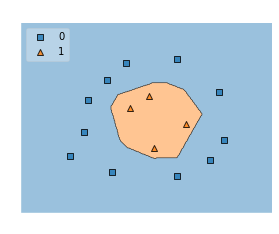

In [156]:
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP: 2 Classes (hidden layer: {})'.format(hidden), c='w')
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)',c='w')
plt.ylabel('d (diameter)', c='w')

In [157]:
# ในวงกลมคือสิ่งที่ model คิดว่าเป็น 1

In [158]:
[coef.shape for coef in model.coefs_]

[(2, 10), (10, 1)]

## Loss curve

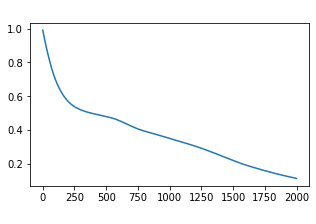

In [159]:
plt.figure(figsize=(5,3))
plt.title('Loss curve', c='w')
plt.xlabel('Iteration', c='w')
plt.plot(model.loss_curve_)
plt.show()


In [160]:
len(model.loss_curve_)

2000